In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Load the Boston Housing dataset
file_path = r"C:\Users\popov\BostonHousingAnalysis\data\BostonHousing.csv"
df_original = pd.read_csv(file_path)

# Display the first few rows to ensure the data is loaded correctly
df_original.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tqdm

In [5]:
# Check for missing values in the dataset
print("Missing values for each column:")
print(df_original.isnull().sum())

Missing values for each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [6]:
# Check the data types of each column to identify categorical variables
print("\nData types of each column:")
print(df_original.dtypes)



Data types of each column:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


In [7]:
# Splitting the data into features and target variable
X = df_original.drop(columns='medv')
y = df_original['medv']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to ensure everything is split correctly
print("\nShapes of the training and testing data:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shapes of the training and testing data:
(404, 13) (102, 13) (404,) (102,)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model using R2 score and RMSE
print("\nModel Evaluation:")
print("R2 Score - Train: ", r2_score(y_train, y_train_pred))
print("R2 Score - Test: ", r2_score(y_test, y_test_pred))
print("RMSE - Train: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE - Test: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))



Model Evaluation:
R2 Score - Train:  0.9772267182453291
R2 Score - Test:  0.8922527442109116
RMSE - Train:  1.4065534125923715
RMSE - Test:  2.8109631609391226


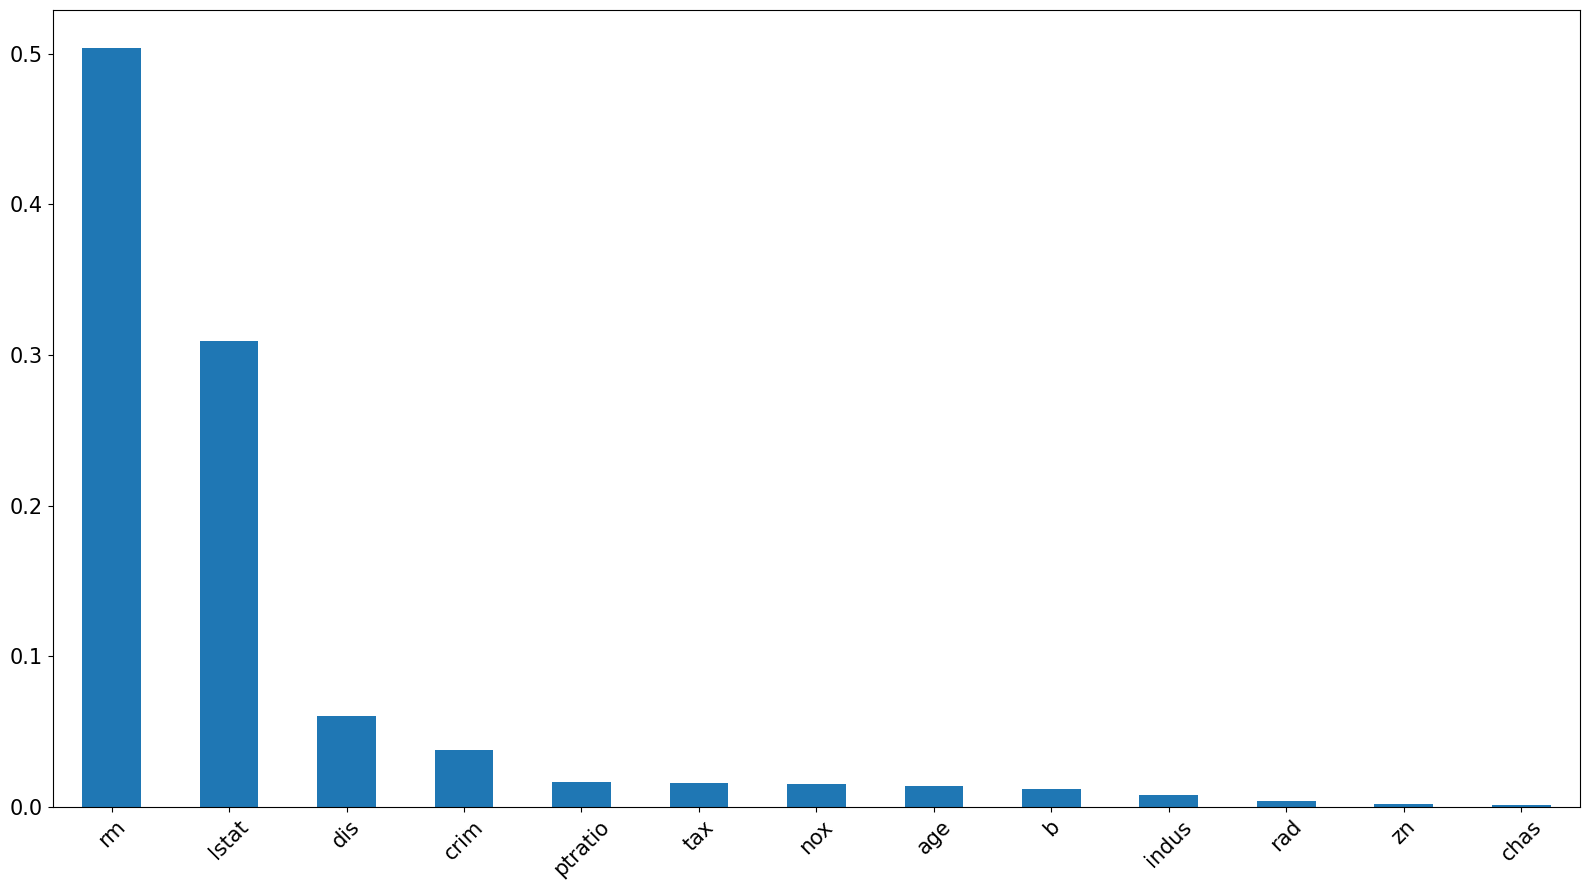

In [10]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_train.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


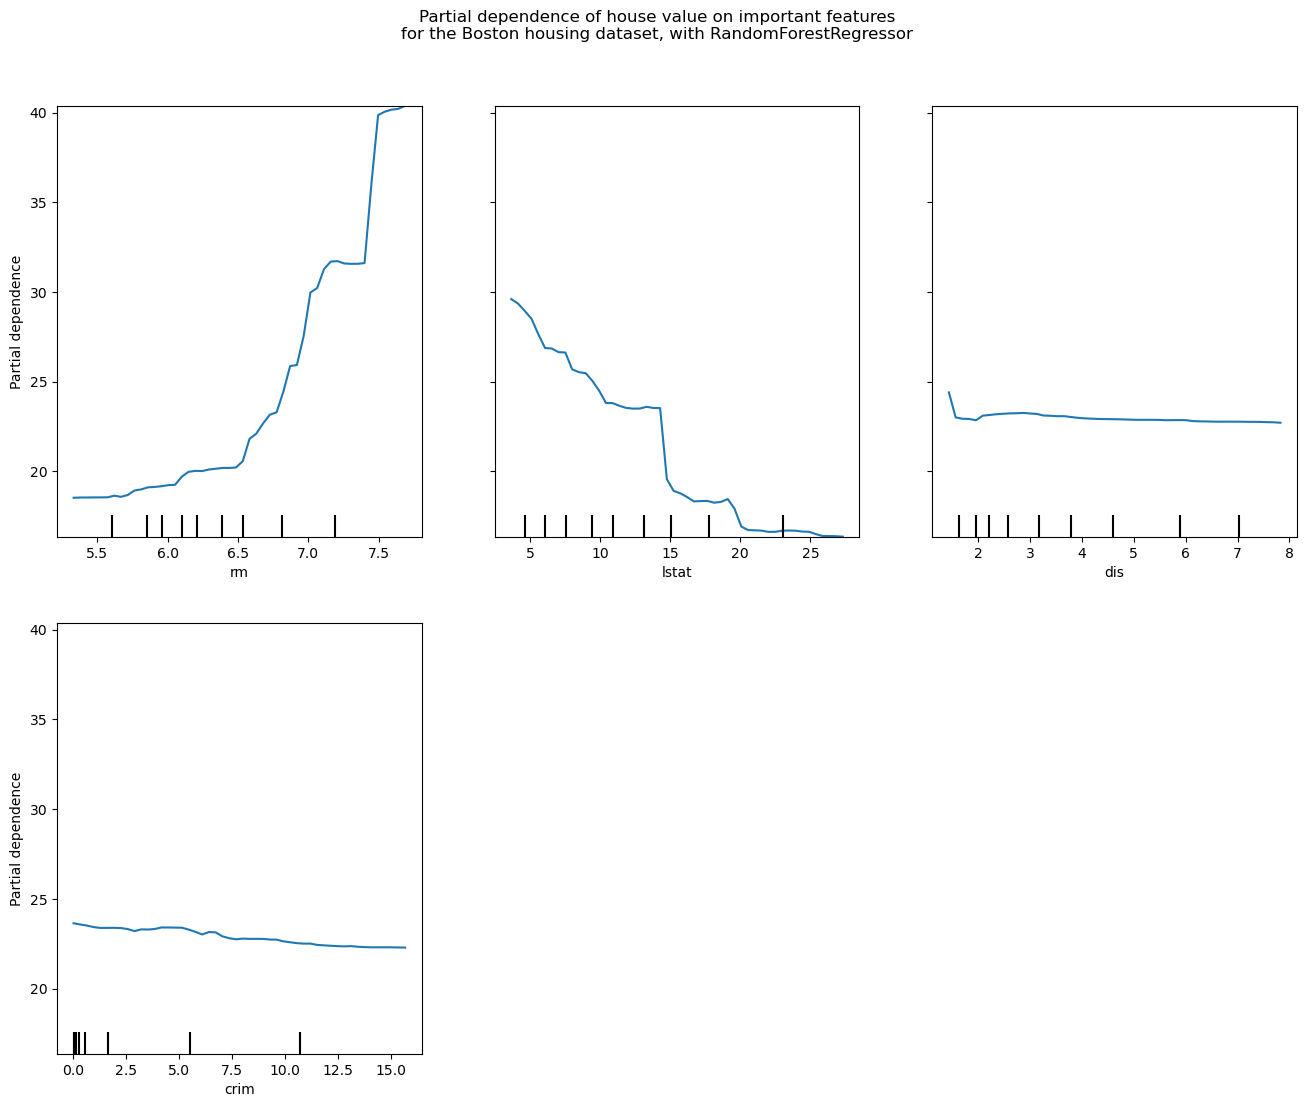

In [12]:
from sklearn.inspection import PartialDependenceDisplay

# Important features as per your observation
features = ['rm', 'lstat', 'dis', 'crim']

# Creating partial dependence plots
fig, ax = plt.subplots(figsize=(16, 12))
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, features, grid_resolution=50, ax=ax)
plt.suptitle('Partial dependence of house value on important features\n'
             'for the Boston housing dataset, with RandomForestRegressor')
plt.subplots_adjust(top=0.9)  # adjust title position
plt.show()


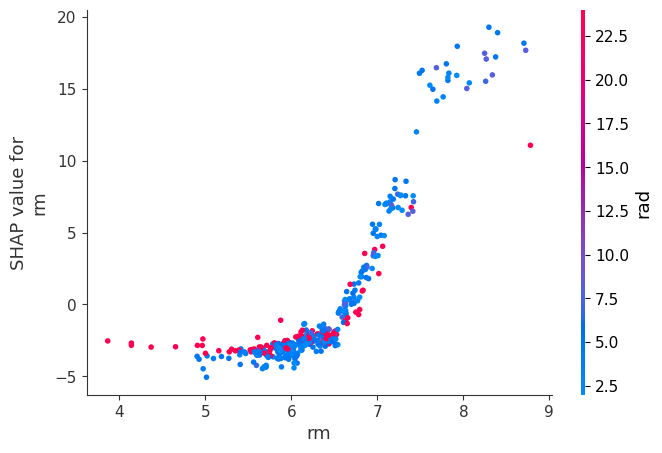

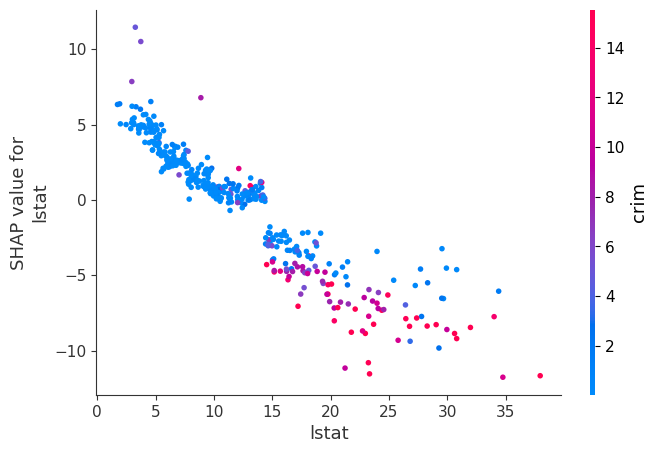

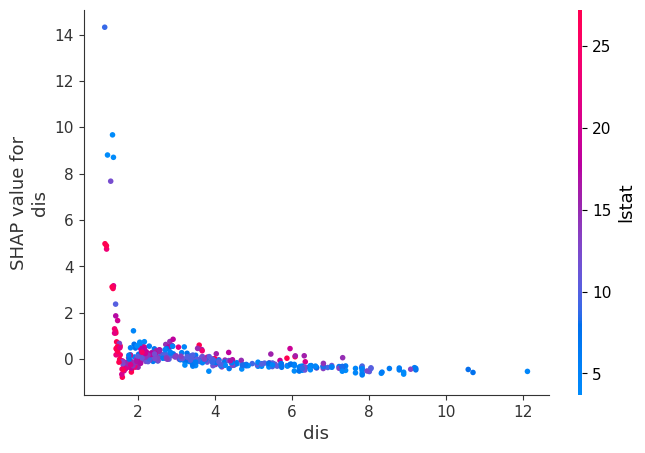

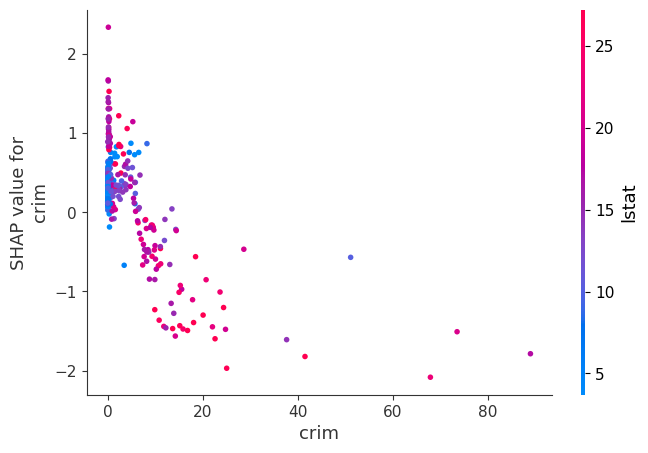

In [13]:
import shap

# Create a tree explainer object
explainer = shap.TreeExplainer(rf_model)

# Calculate Shap values
shap_values = explainer.shap_values(X_train)

# SHAP Dependence plots for important features
for feature in features:
    shap.dependence_plot(feature, shap_values, X_train)


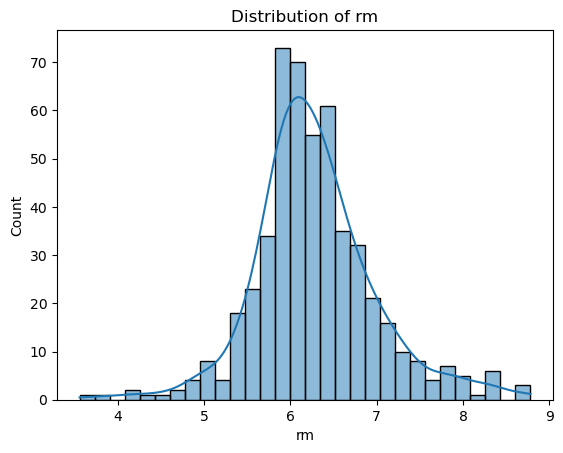

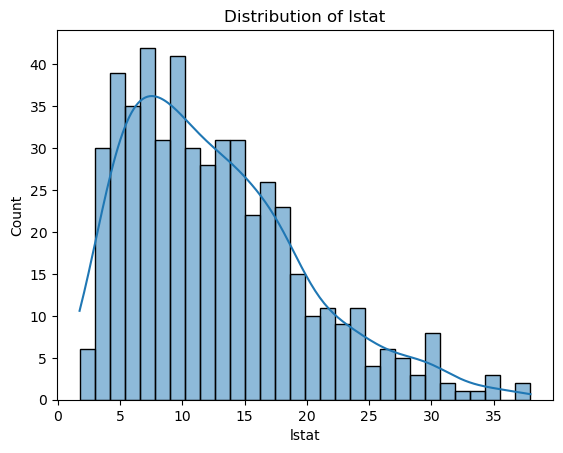

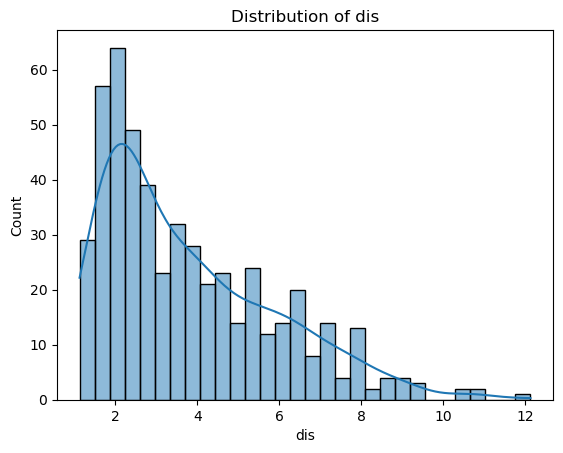

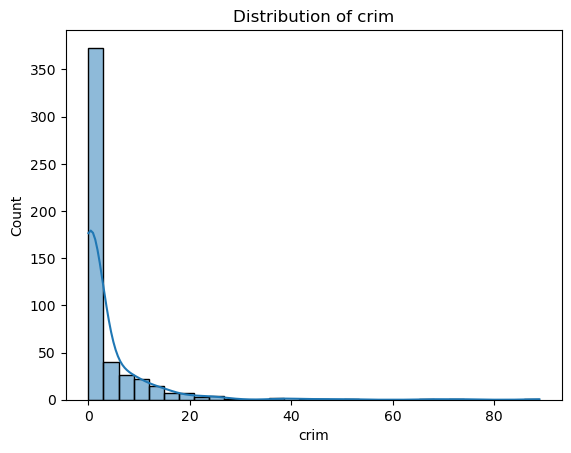

In [14]:
# Distribution of Important Features

import seaborn as sns

for feature in features:
    sns.histplot(data=df_original, x=feature, bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


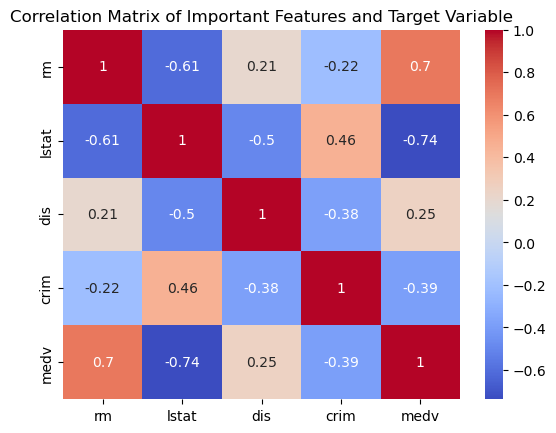

In [15]:
# Correlation Analysis

correlation_matrix = df_original[features + ['medv']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Important Features and Target Variable')
plt.show()


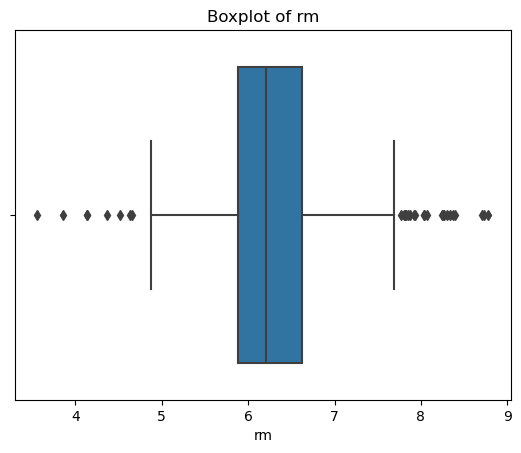

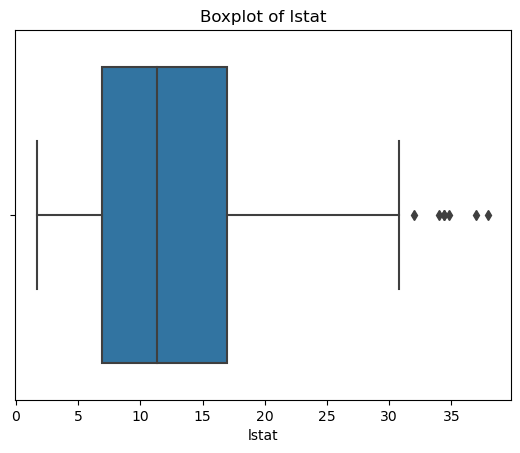

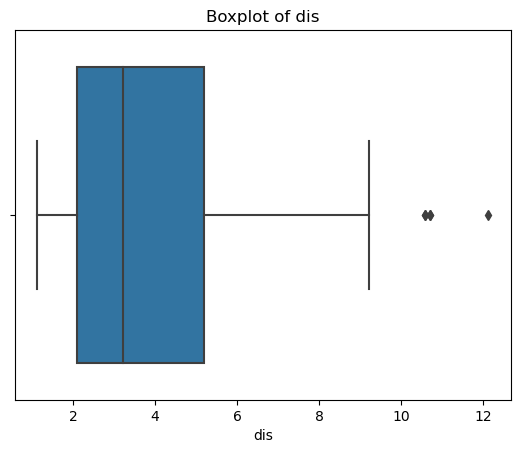

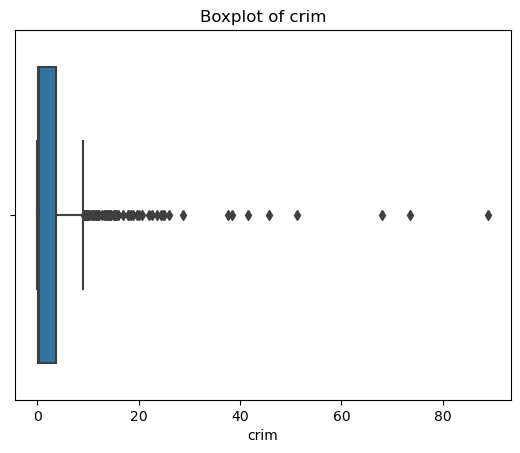

In [17]:
# Boxplot for Outlier Detection

for feature in features:
    sns.boxplot(x=df_original[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
predictions = rf_model.predict(X_test)

# 1. Feature Importances
feature_importances = rf_model.feature_importances_
features = X_test.columns
feature_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Displaying the top 5 important features
print("Top 5 Important Features:")
print(feature_df.head())

# 2. Model Predictions vs. Actual Values
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": predictions})
pred_df_summary = pred_df.describe()

# Display summary statistics of actual vs predicted values
print("\nSummary Statistics for Actual vs Predicted Values:")
print(pred_df_summary)

# Calculating and displaying key metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 3. Residual Analysis
residuals = y_test - predictions

# Displaying summary statistics of residuals
print("\nSummary Statistics for Residuals:")
print(residuals.describe())



Top 5 Important Features:
    Feature  Importance
5        rm    0.503845
12    lstat    0.309509
7       dis    0.060549
0      crim    0.038062
10  ptratio    0.016313

Summary Statistics for Actual vs Predicted Values:
           Actual   Predicted
count  102.000000  102.000000
mean    21.488235   21.314951
std      8.605804    7.857787
min      5.000000    7.084000
25%     17.125000   15.826500
50%     20.150000   20.681500
75%     24.075000   23.888250
max     50.000000   46.154000

Model Performance Metrics:
Mean Absolute Error (MAE): 2.04
Mean Squared Error (MSE): 7.90
Root Mean Squared Error (RMSE): 2.81
R2 Score: 0.89

Summary Statistics for Residuals:
count    102.000000
mean       0.173284
std        2.819472
min      -14.300000
25%       -1.401000
50%       -0.034500
75%        1.638000
max        8.267000
Name: medv, dtype: float64
